In [1]:
#importing the neccesary libraries for object detection

#numpy import
import numpy as np

#pandas import
import pandas as pd

#matplotlib pyplot import
import matplotlib.pyplot as plt

#os import (for path functions)
import os

#opencv2 import
import cv2


In [2]:
#read the csv file created before
df = pd.read_csv('csv/labels.csv')

#check if the file was read correctly
df.head()

filepath  xmin  xmax  ymin  ymax
0    ./dataset/tensorflow/labels\N1.xml  1093  1396   645   727
1  ./dataset/tensorflow/labels\N100.xml   134   301   312   350
2  ./dataset/tensorflow/labels\N101.xml    31   139   128   161
3  ./dataset/tensorflow/labels\N102.xml   164   316   216   243
4  ./dataset/tensorflow/labels\N103.xml   813  1067   665   724

In [3]:
#import the necessary libraries to can read xml file for images

#xml.etree.elementtree import as xet
import xml.etree.ElementTree as xet
ind = 0
#get the filepath of index 0 from dataframe as filename
filename = df['filepath'][ind]

#checking if is reading the correct index and print it out
filename


'./dataset/tensorflow/labels\\N1.xml'

In [4]:
#get the image filename as test
xet.parse(filename).getroot().find('filename').text

'N1.jpeg'

In [5]:
#parse the xml data with filename to get image_filename as a function and return filepath image
def getFileName(filename):
    filename_image = xet.parse(filename).getroot().find('filename').text
    #get filepath of image because i can't use the filename_image to process with opencv
    filepath_image = os.path.join('./dataset/tensorflow/images/', filename_image)
    return filepath_image

In [6]:
#check if the function is working
getFileName(filename)

'./dataset/tensorflow/images/N1.jpeg'

In [7]:
#applying the previous created function to entire dataframe
df['filepath'].apply(getFileName)

0        ./dataset/tensorflow/images/N1.jpeg
1      ./dataset/tensorflow/images/N100.jpeg
2      ./dataset/tensorflow/images/N101.jpeg
3      ./dataset/tensorflow/images/N102.jpeg
4      ./dataset/tensorflow/images/N103.jpeg
                       ...                  
220     ./dataset/tensorflow/images/N95.jpeg
221     ./dataset/tensorflow/images/N96.jpeg
222     ./dataset/tensorflow/images/N97.jpeg
223     ./dataset/tensorflow/images/N98.jpeg
224     ./dataset/tensorflow/images/N99.jpeg
Name: filepath, Length: 225, dtype: object

In [8]:
#convert the previous code to a list defined as image_path
image_path = list(df['filepath'].apply(getFileName))

In [9]:
#check if the previous list is populated
#image_path

### VERYFING THE IMAGE AND OUTPUT

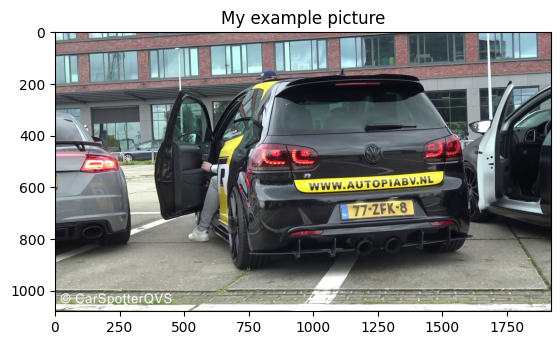

In [10]:
#read the first image with cv2 library and show the image


#use the first image as test. Pass the image path as file_path
file_path = image_path[ind]
img = cv2.imread(file_path)
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#visualize the image
plt.imshow(rgb_img)
plt.title('My example picture')
plt.show()

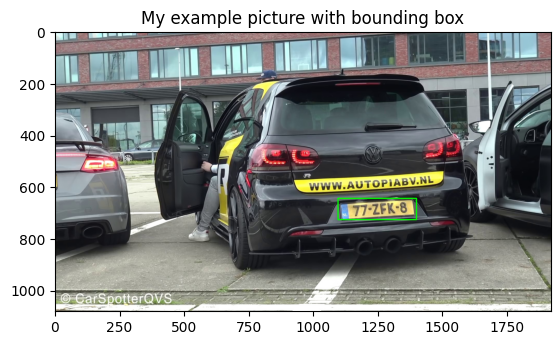

In [11]:
#draw the bounding box around the number_plate with cv2
xmin = df.iloc[ind]['xmin']
xmax = df.iloc[ind]['xmax']
ymin = df.iloc[ind]['ymin']
ymax = df.iloc[ind]['ymax']
rgb_img_with_rectangle = cv2.rectangle(rgb_img,(xmin,ymin),(xmax,ymax), (0, 255, 0), 3)
plt.imshow(rgb_img_with_rectangle)
plt.title('My example picture with bounding box')
plt.show()

### Data Pre-processing

In [12]:
#import the neccesary libraries for data pre-processing

#import train_test_split from sklearn
from sklearn.model_selection import train_test_split

#import load_img and img_to_array from tensorflow libraries
from tensorflow.keras.preprocessing.image import load_img, img_to_array


In [13]:
#load a img and converting it to an array
#using iloc on dataframe to get all values for xmin,xmax, ymin,ymax and converting it to an array, assigning to labels parameter

labels = df.iloc[:,1:].values


In [14]:
#use the first image as array
index = 0
image = image_path[index]
img_arr = cv2.imread(image)

#get the height,width and depth of a image and assigning them an array
height, width, depth = img_arr.shape

#pre-processing and normalization
#resize the image to 224x224 size
load_image = load_img(image,target_size=(224,224))

#convert load_image to array using img_to_array
load_image_arr = img_to_array(load_image)

#normalize the load_image_arr (dividing the array with 255 because is the max value in RGB space)
normalized_load_image_arr = load_image_arr/255.0 # normalization of input

#normalization to the labels (range from 0 to 1)
xmin, xmax, ymin, ymax = labels[index]

#to can normalize the values x should be divided by width and y should be divided by height
N_xmin, N_xmax = xmin/width, xmax/width
N_ymin, N_ymax = ymin/height, ymax/height

normalized_labels = (N_xmin, N_xmax, N_ymin, N_ymax) # normalization of output


In [15]:
#check the normalized labels
normalized_labels

(0.5692708333333333,
 0.7270833333333333,
 0.5972222222222222,
 0.6731481481481482)

In [16]:
#check the normalized load_image_arr
#normalized_load_image_arr

In [17]:
#get the lenght of image_path
iteration_range = len(image_path)

In [18]:
#create an empty lists called data and output
data = []
output = []

#writing a loop for entire dataframe
for index in range(iteration_range):
    image = image_path[index]
    img_arr = cv2.imread(image)
    height, width, depth = img_arr.shape
    load_image = load_img(image,target_size=(224,224))
    load_image_arr = img_to_array(load_image)
    normalized_load_image_arr = load_image_arr/255.0
    xmin, xmax, ymin, ymax = labels[index]
    N_xmin, N_xmax = xmin/width, xmax/width
    N_ymin, N_ymax = ymin/height, ymax/height
    normalized_labels = (N_xmin, N_xmax, N_ymin, N_ymax)
    # ---------- append all the values ----------
    data.append(normalized_load_image_arr)
    output.append(normalized_labels)

In [19]:
#check the data
#data

In [20]:
#check the output
#output

### Split data as train and test set

In [21]:
# convert data and output to an array using numpy and specify the datatype as float32
X = np.array(data,dtype=np.float32)
Y = np.array(output,dtype=np.float32)

In [22]:
#check the shape of X and Y
X.shape, Y.shape

((225, 224, 224, 3), (225, 4))

# Will have 4 outputs (xmin, xmax, ymin, ymax) for an regression model

In [23]:
# split the data in training and testing with train_test_split, 
# using train_size ratio of 80%(train), 20%(test) and random_state of 0 
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, random_state=0)

In [24]:
# checking the train and test shape of each array
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((180, 224, 224, 3), (45, 224, 224, 3), (180, 4), (45, 4))

#### -------- X and Y analyse -------- 
#### From previous print that will be 180 images for x_train and y_train
#### From previous print that will be 45 images for x_test and y_test


# Deep Learning Model

## Can use MobileNetV2, InceptionV3 and InceptionResNetV2 as a training models for our dataset as a predefined models from keras

In [25]:
# importing the necessary libraries to can train the model

# importing MobileNetV2 from tensorflow.keras
from tensorflow.keras.applications import MobileNetV3Large, InceptionV3, InceptionResNetV2

# Importing the required keras layers (Dense, Dropout, Flatten, Input)
from tensorflow.keras.layers import Dense, Dropout, Flatten, Layer, Input

# Importing the Model from keras.models
from tensorflow.keras.models import Model

# importing tensorflow as tf
import tensorflow as tf

import tensorflow_addons as tfa


gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)



# Decided to use InceptionResNetV2 based on the research

In [26]:
# starting to build the inception model
# will use weights of imagenet, will not include the top and the input_tensor will be the shape of the image determined before
inception_resnet = InceptionResNetV2(weights="imagenet",include_top=False, input_tensor=Input(shape=(224,224,3)))

# will set the inception trainable to not change the weight
inception_resnet.trainable = False

# Creating an CNN (Convulational Neural Network) for training
# creating the head model
head_model = inception_resnet.output

# try to flatten our data
head_model = Flatten()(head_model)

# Build a new layer of 500 neurons on top of previous layer and use an activation function of relu
head_model = Dense(500, activation= 'relu')(head_model)

# Build a new layer of 250 neurons on top of previous layer and use an activation function of relu (Split to half )
head_model = Dense(250, activation= 'relu')(head_model)

# set the output of Neural network to 4 (is the value from y_test)
# use as activation function sigmoid
# Because of output is between 0 and 1 I am interested to use the sigmoid activation function
head_model = Dense(4, activation='sigmoid')(head_model)

# Start to define our model using inception_resnet as input and output as head_model
model = Model(inputs=inception_resnet.input, outputs=head_model)

### Compiling our model

In [27]:
# Because of is a regression model, for the loss will use mse (MeanSquaredError)
# The optimizer used for this model will Keras Adam optimizer with the smallest value possible (1e-4)

model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), metrics=['acc'])

In [28]:
#check the model summarry
#print(model.summary())

# Deleting the object_detection folder first

In [32]:
import glob, os, time

def del_folder(dir_name):
    
    dir_path = os.getcwd() +  "./{}".format(dir_name)
    try:
        os.rmdir(dir_path)  # remove the folder
    except:
        print("")   # couldn't remove the folder because we have files inside it
    finally:
        # now iterate through files in that folder and delete them one by one and delete the folder at the end
        try:
            for filepath in os.listdir(dir_path):
                os.remove(dir_path +  "/{}".format(filepath))
            os.rmdir(dir_path)
            print("Folder is deleted.")
        except:
            print("Folder is not there.")
del_folder('training/object_detection/train')
del_folder('training/object_detection/validation')
del_folder('training/object_detection/')
del_folder('training')
time.sleep(5)


Folder is deleted.

Folder is deleted.
Folder is not there.
Folder is not there.


# Model training

In [33]:
# Importing the required libraries for model training and use them accordingly

# Importing TensorBoard from tensorflow tho can check the model performance afterwards
from tensorflow.keras.callbacks import TensorBoard

# Create a variable to can use TensorBoard with the name tfb, including with a log directory
tfb = TensorBoard('./training/object_detection')

tqdm_callback = tfa.callbacks.TQDMProgressBar()

# Fit our model to history var and start the training of the model
# x = x_train (defined before) (80%)
# y = y_train (defined before) (80%)
# batch_size = 20 (can be less depends on the speed of computer)
# epochs = 100 (how long will train)
# validation_data = x_test, y_test (checking the training model with the last 20% of dataset)
# callbacks = tfb (logging the history of the model)en(train_data)
history = model.fit(x=x_train, y=y_train,batch_size=20,epochs=160,
          validation_data=(x_test, y_test),callbacks=[tqdm_callback,tfb],
          verbose=0)


Training:   0%|                                                                                               …

Epoch 1/160


0/9                                                                                                           …

Epoch 2/160


0/9                                                                                                           …

Epoch 3/160


0/9                                                                                                           …

Epoch 4/160


0/9                                                                                                           …

Epoch 5/160


0/9                                                                                                           …

Epoch 6/160


0/9                                                                                                           …

Epoch 7/160


0/9                                                                                                           …

Epoch 8/160


0/9                                                                                                           …

Epoch 9/160


0/9                                                                                                           …

Epoch 10/160


0/9                                                                                                           …

Epoch 11/160


0/9                                                                                                           …

Epoch 12/160


0/9                                                                                                           …

Epoch 13/160


0/9                                                                                                           …

Epoch 14/160


0/9                                                                                                           …

Epoch 15/160


0/9                                                                                                           …

Epoch 16/160


0/9                                                                                                           …

Epoch 17/160


0/9                                                                                                           …

Epoch 18/160


0/9                                                                                                           …

Epoch 19/160


0/9                                                                                                           …

Epoch 20/160


0/9                                                                                                           …

Epoch 21/160


0/9                                                                                                           …

Epoch 22/160


0/9                                                                                                           …

Epoch 23/160


0/9                                                                                                           …

Epoch 24/160


0/9                                                                                                           …

Epoch 25/160


0/9                                                                                                           …

Epoch 26/160


0/9                                                                                                           …

Epoch 27/160


0/9                                                                                                           …

Epoch 28/160


0/9                                                                                                           …

Epoch 29/160


0/9                                                                                                           …

Epoch 30/160


0/9                                                                                                           …

Epoch 31/160


0/9                                                                                                           …

Epoch 32/160


0/9                                                                                                           …

Epoch 33/160


0/9                                                                                                           …

Epoch 34/160


0/9                                                                                                           …

Epoch 35/160


0/9                                                                                                           …

Epoch 36/160


0/9                                                                                                           …

Epoch 37/160


0/9                                                                                                           …

Epoch 38/160


0/9                                                                                                           …

Epoch 39/160


0/9                                                                                                           …

Epoch 40/160


0/9                                                                                                           …

Epoch 41/160


0/9                                                                                                           …

Epoch 42/160


0/9                                                                                                           …

Epoch 43/160


0/9                                                                                                           …

Epoch 44/160


0/9                                                                                                           …

Epoch 45/160


0/9                                                                                                           …

Epoch 46/160


0/9                                                                                                           …

Epoch 47/160


0/9                                                                                                           …

Epoch 48/160


0/9                                                                                                           …

Epoch 49/160


0/9                                                                                                           …

Epoch 50/160


0/9                                                                                                           …

Epoch 51/160


0/9                                                                                                           …

Epoch 52/160


0/9                                                                                                           …

Epoch 53/160


0/9                                                                                                           …

Epoch 54/160


0/9                                                                                                           …

Epoch 55/160


0/9                                                                                                           …

Epoch 56/160


0/9                                                                                                           …

Epoch 57/160


0/9                                                                                                           …

Epoch 58/160


0/9                                                                                                           …

Epoch 59/160


0/9                                                                                                           …

Epoch 60/160


0/9                                                                                                           …

Epoch 61/160


0/9                                                                                                           …

Epoch 62/160


0/9                                                                                                           …

Epoch 63/160


0/9                                                                                                           …

Epoch 64/160


0/9                                                                                                           …

Epoch 65/160


0/9                                                                                                           …

Epoch 66/160


0/9                                                                                                           …

Epoch 67/160


0/9                                                                                                           …

Epoch 68/160


0/9                                                                                                           …

Epoch 69/160


0/9                                                                                                           …

Epoch 70/160


0/9                                                                                                           …

Epoch 71/160


0/9                                                                                                           …

Epoch 72/160


0/9                                                                                                           …

Epoch 73/160


0/9                                                                                                           …

Epoch 74/160


0/9                                                                                                           …

Epoch 75/160


0/9                                                                                                           …

Epoch 76/160


0/9                                                                                                           …

Epoch 77/160


0/9                                                                                                           …

Epoch 78/160


0/9                                                                                                           …

Epoch 79/160


0/9                                                                                                           …

Epoch 80/160


0/9                                                                                                           …

Epoch 81/160


0/9                                                                                                           …

Epoch 82/160


0/9                                                                                                           …

Epoch 83/160


0/9                                                                                                           …

Epoch 84/160


0/9                                                                                                           …

Epoch 85/160


0/9                                                                                                           …

Epoch 86/160


0/9                                                                                                           …

Epoch 87/160


0/9                                                                                                           …

Epoch 88/160


0/9                                                                                                           …

Epoch 89/160


0/9                                                                                                           …

Epoch 90/160


0/9                                                                                                           …

Epoch 91/160


0/9                                                                                                           …

Epoch 92/160


0/9                                                                                                           …

Epoch 93/160


0/9                                                                                                           …

Epoch 94/160


0/9                                                                                                           …

Epoch 95/160


0/9                                                                                                           …

Epoch 96/160


0/9                                                                                                           …

Epoch 97/160


0/9                                                                                                           …

Epoch 98/160


0/9                                                                                                           …

Epoch 99/160


0/9                                                                                                           …

Epoch 100/160


0/9                                                                                                           …

Epoch 101/160


0/9                                                                                                           …

Epoch 102/160


0/9                                                                                                           …

Epoch 103/160


0/9                                                                                                           …

Epoch 104/160


0/9                                                                                                           …

Epoch 105/160


0/9                                                                                                           …

Epoch 106/160


0/9                                                                                                           …

Epoch 107/160


0/9                                                                                                           …

Epoch 108/160


0/9                                                                                                           …

Epoch 109/160


0/9                                                                                                           …

Epoch 110/160


0/9                                                                                                           …

Epoch 111/160


0/9                                                                                                           …

Epoch 112/160


0/9                                                                                                           …

Epoch 113/160


0/9                                                                                                           …

Epoch 114/160


0/9                                                                                                           …

Epoch 115/160


0/9                                                                                                           …

Epoch 116/160


0/9                                                                                                           …

Epoch 117/160


0/9                                                                                                           …

Epoch 118/160


0/9                                                                                                           …

Epoch 119/160


0/9                                                                                                           …

Epoch 120/160


0/9                                                                                                           …

Epoch 121/160


0/9                                                                                                           …

Epoch 122/160


0/9                                                                                                           …

Epoch 123/160


0/9                                                                                                           …

Epoch 124/160


0/9                                                                                                           …

Epoch 125/160


0/9                                                                                                           …

Epoch 126/160


0/9                                                                                                           …

Epoch 127/160


0/9                                                                                                           …

Epoch 128/160


0/9                                                                                                           …

Epoch 129/160


0/9                                                                                                           …

Epoch 130/160


0/9                                                                                                           …

Epoch 131/160


0/9                                                                                                           …

Epoch 132/160


0/9                                                                                                           …

Epoch 133/160


0/9                                                                                                           …

Epoch 134/160


0/9                                                                                                           …

Epoch 135/160


0/9                                                                                                           …

Epoch 136/160


0/9                                                                                                           …

Epoch 137/160


0/9                                                                                                           …

Epoch 138/160


0/9                                                                                                           …

Epoch 139/160


0/9                                                                                                           …

Epoch 140/160


0/9                                                                                                           …

Epoch 141/160


0/9                                                                                                           …

Epoch 142/160


0/9                                                                                                           …

Epoch 143/160


0/9                                                                                                           …

Epoch 144/160


0/9                                                                                                           …

Epoch 145/160


0/9                                                                                                           …

Epoch 146/160


0/9                                                                                                           …

Epoch 147/160


0/9                                                                                                           …

Epoch 148/160


0/9                                                                                                           …

Epoch 149/160


0/9                                                                                                           …

Epoch 150/160


0/9                                                                                                           …

Epoch 151/160


0/9                                                                                                           …

Epoch 152/160


0/9                                                                                                           …

Epoch 153/160


0/9                                                                                                           …

Epoch 154/160


0/9                                                                                                           …

Epoch 155/160


0/9                                                                                                           …

Epoch 156/160


0/9                                                                                                           …

Epoch 157/160


0/9                                                                                                           …

Epoch 158/160


0/9                                                                                                           …

Epoch 159/160


0/9                                                                                                           …

Epoch 160/160


0/9                                                                                                           …

In [34]:
model.save('./model/object_detection.h5')